## 1. Анализ целевой переменной Y с точки зрения статистики

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
df = pd.read_csv('heart.csv')

In [40]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


In [42]:
df = df.astype({"DEATH": np.uint8, "MD_50": np.uint8, "SES": np.uint8, "MD_62": np.uint8, "CL_STATUS": np.uint8, "IHD_DX": np.uint8})
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [43]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    uint8
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    uint8
 8   CL_STATUS  200 non-null    uint8
 9   MD_62      200 non-null    uint8
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    uint8
 15  DEATH      200 non-null    uint8
dtypes: int64(10), uint8(6)
memory usage: 16.9 KB


In [45]:
print(df.isnull().sum())

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [46]:
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'AGE_50'] = np.nan

In [47]:
print(df_test_nan.isnull().sum())

AGE_50       5
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [48]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


**Выбор целевой переменной**

In [49]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH'],
      dtype='object')

In [50]:
Y = df['DEATH']
X = df.drop('DEATH', axis=1)

**Графический анализ**

In [51]:
numeric_colz = X.select_dtypes(include=['int64'])
numeric_colz

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
0,42,110,65,64,147,291,120,78,271,146
1,53,130,72,69,167,278,122,68,250,165
2,53,120,90,70,222,342,132,90,304,223
3,48,120,80,72,229,239,118,68,209,227
4,53,118,74,66,134,243,118,56,261,138
...,...,...,...,...,...,...,...,...,...,...
195,50,115,80,66,148,300,115,65,273,152
196,23,110,70,69,137,120,112,76,198,153
197,20,130,80,66,150,210,130,85,274,158
198,46,140,84,66,138,130,148,88,160,157


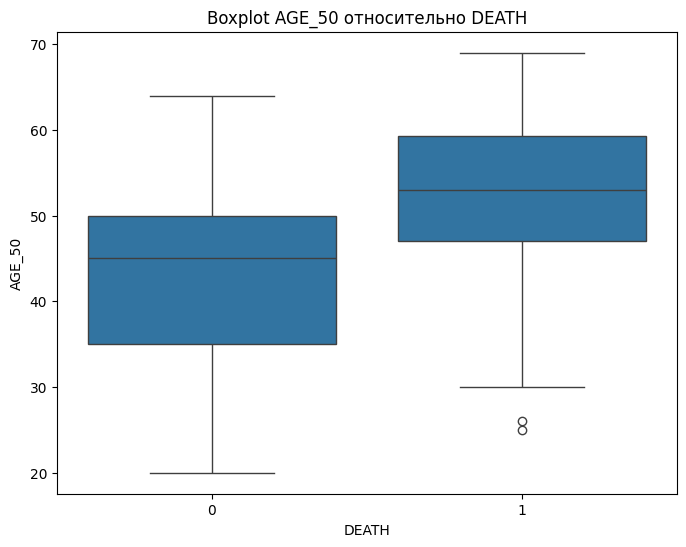

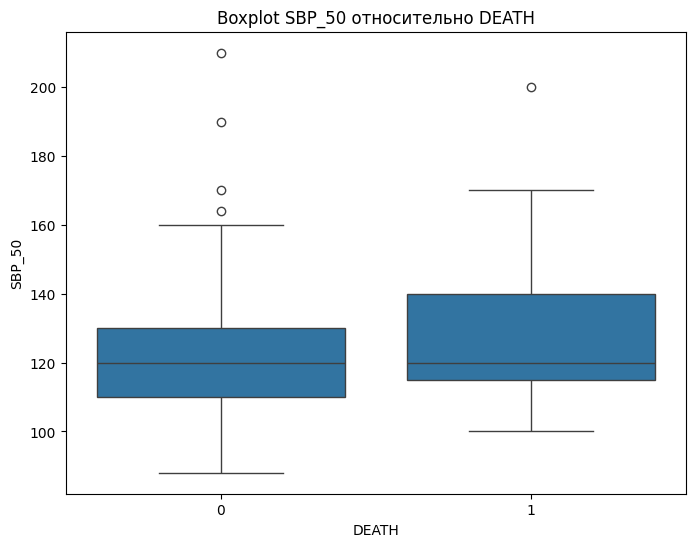

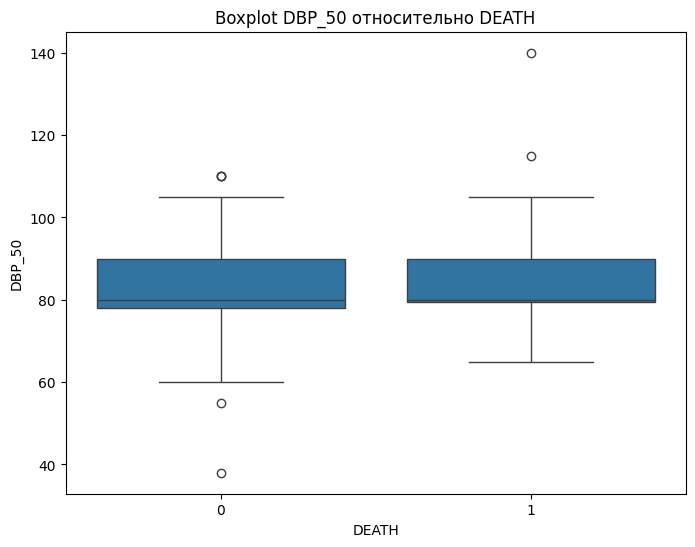

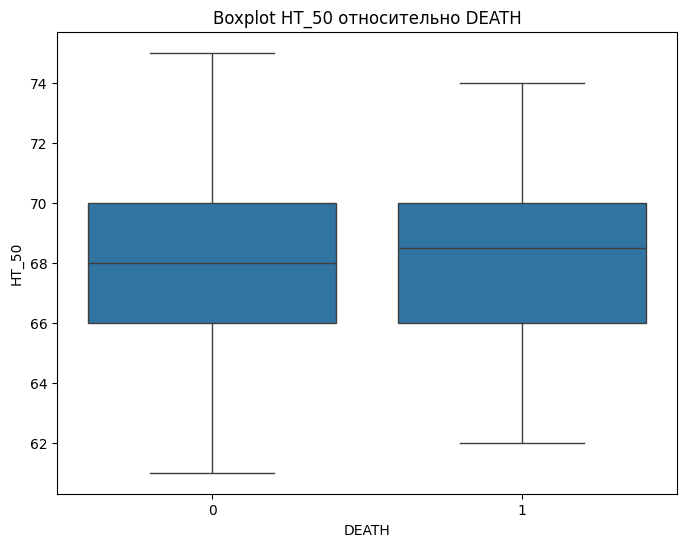

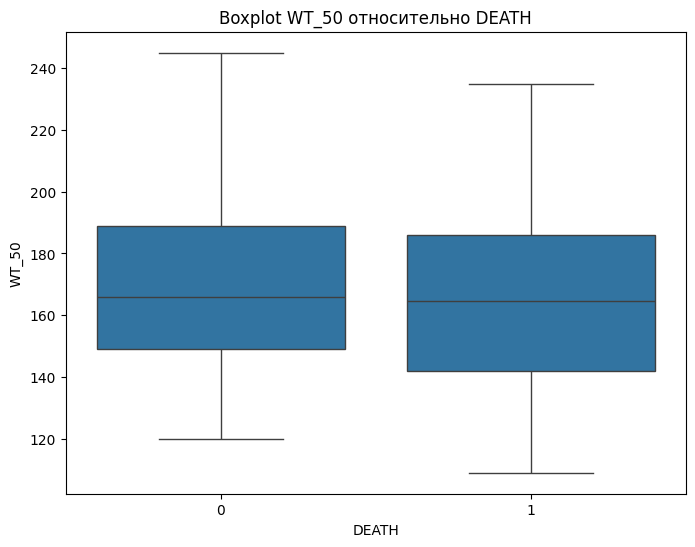

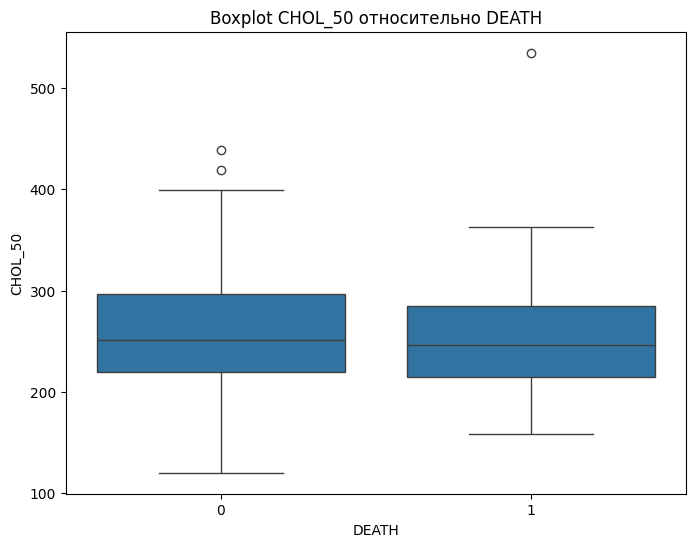

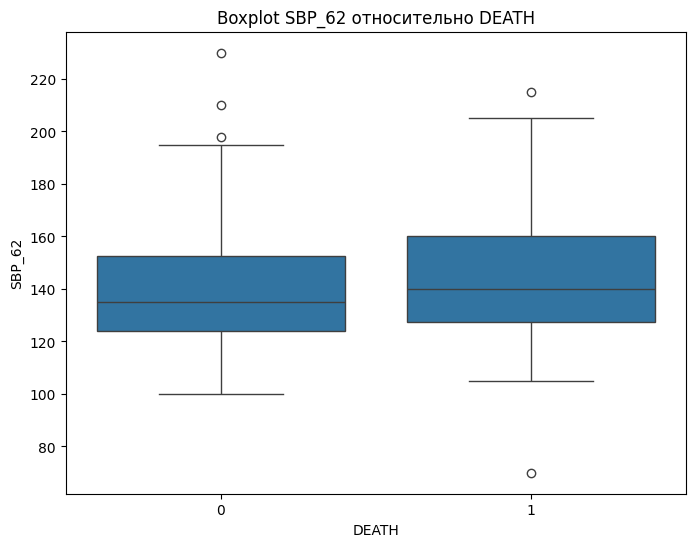

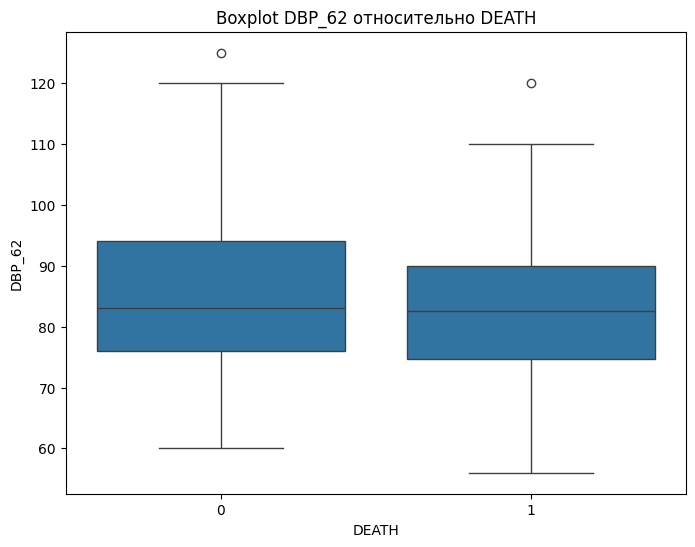

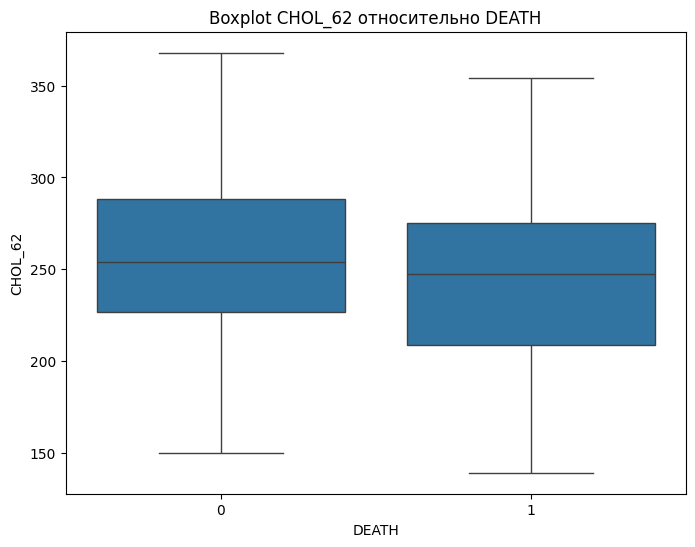

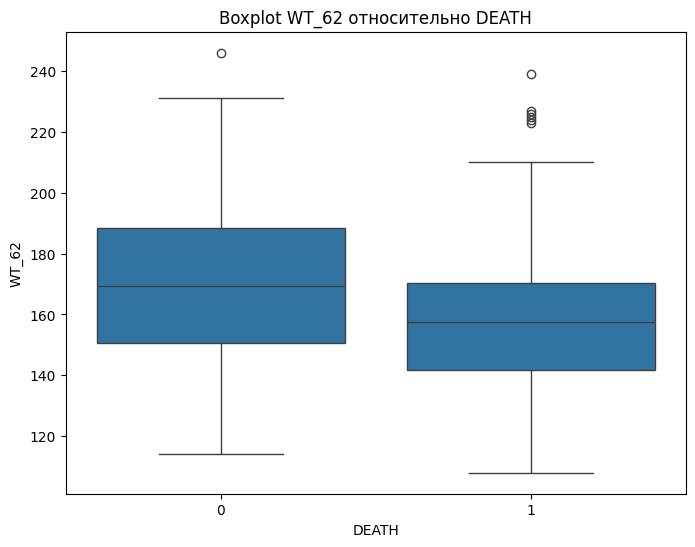

In [52]:
for col in numeric_colz:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='DEATH', y=col, data=df)
    plt.title(f'Boxplot {col} относительно DEATH')
    plt.show

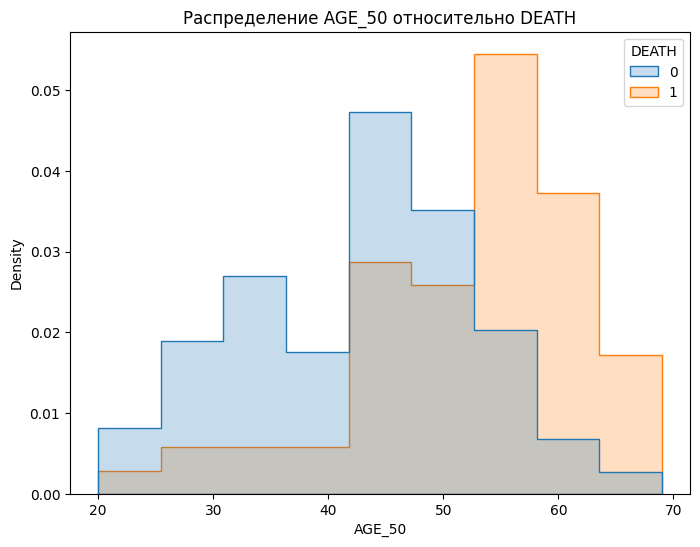

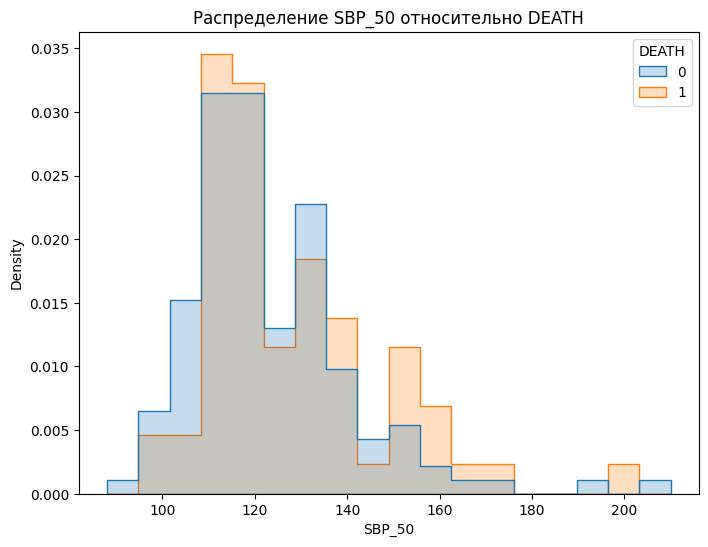

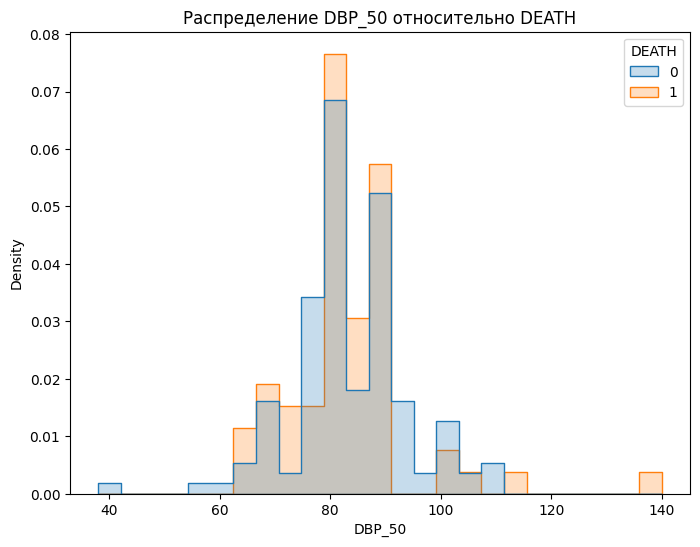

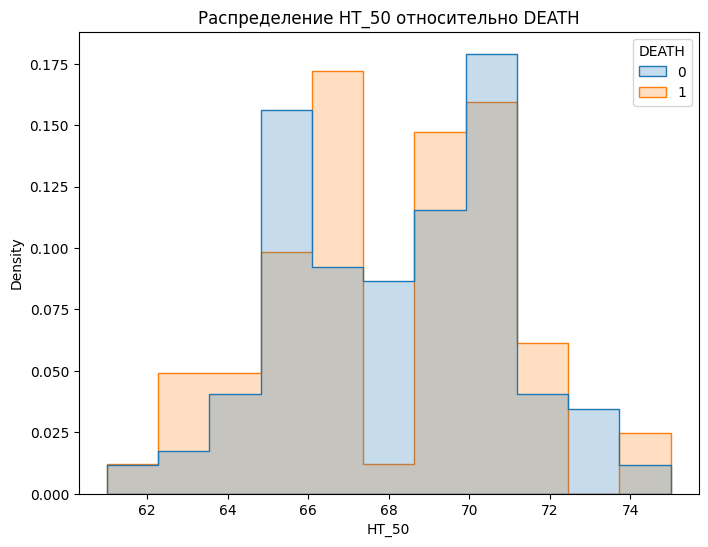

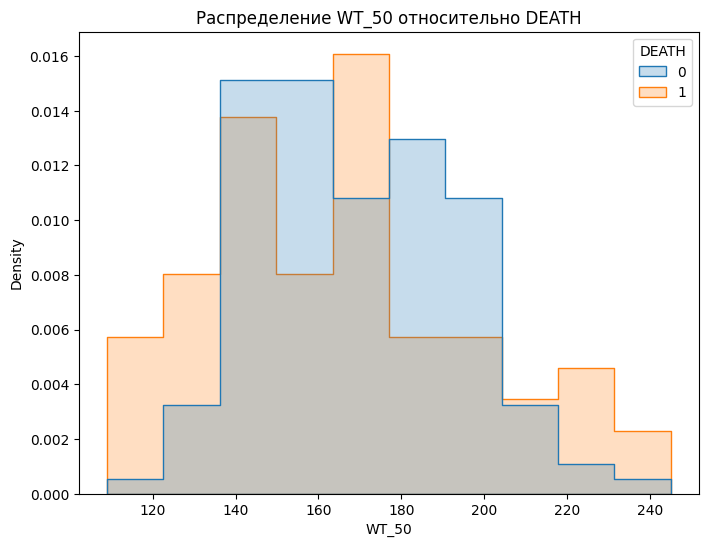

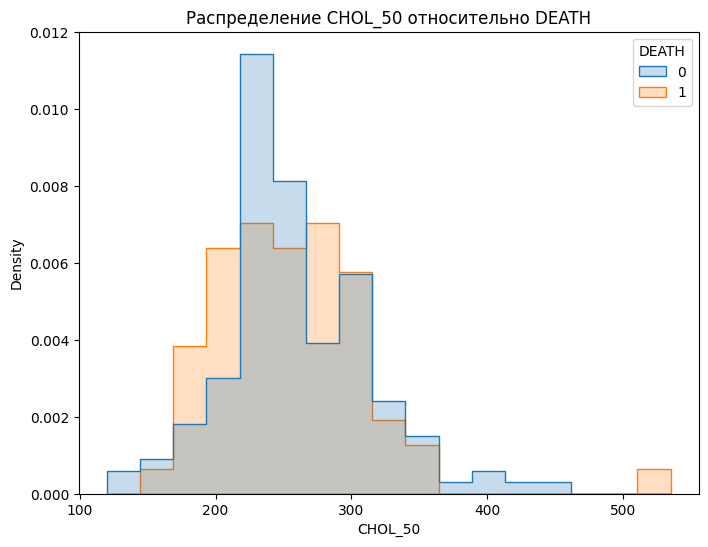

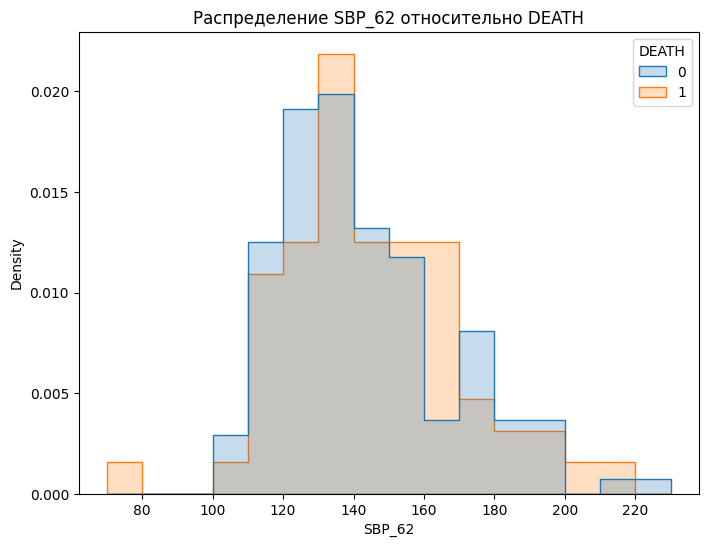

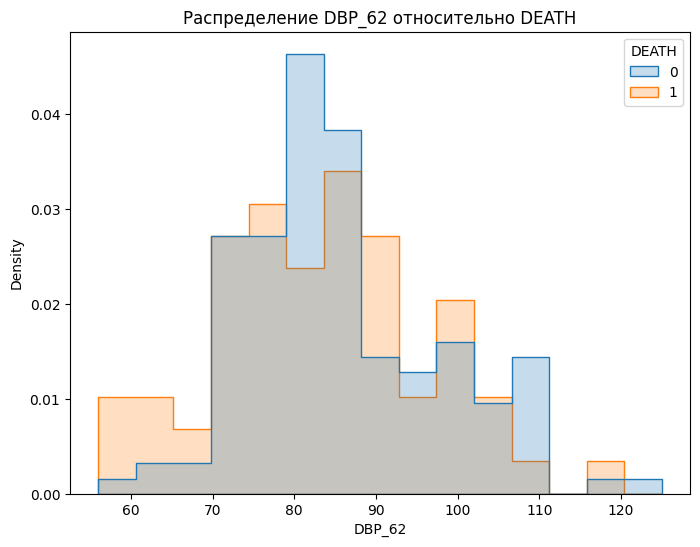

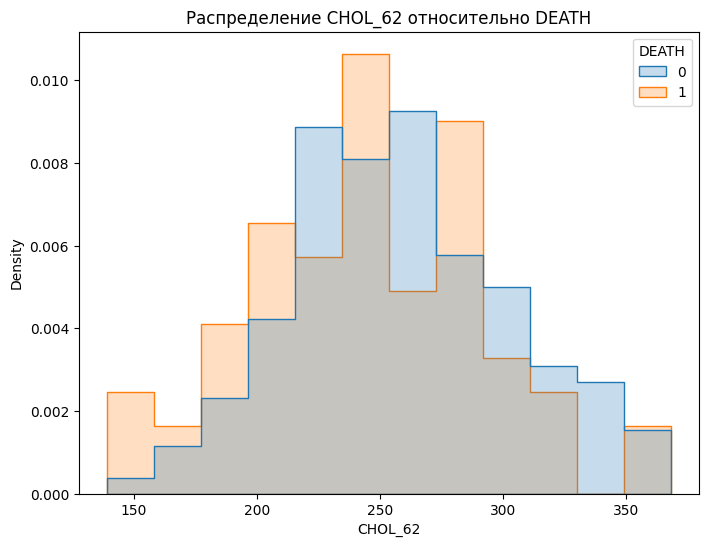

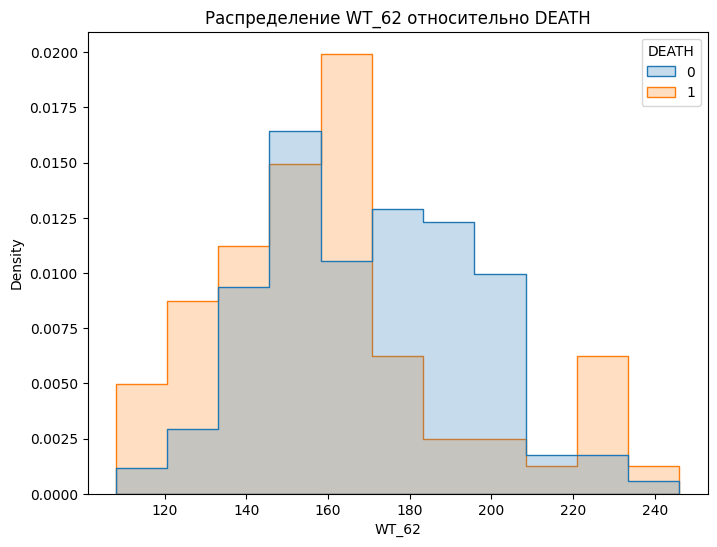

In [53]:
for col in numeric_colz:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='DEATH', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно DEATH')
    plt.show()

Нормальное распределение в графиках показывает, что при нормальных показателях смертность не вырастает.
Видно, что при отклонении от нормальных показателей смертность возрастает.
Исключение составляет показатель AGE_50, видно, что при его возрастании увеличивается количество случаев смерти.

In [73]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('DEATH')[df.select_dtypes(include=[np.number]).columns].describe()

In [76]:
for col in numeric_colz:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('DEATH')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для AGE_50:

       count     mean       std   min   25%   50%    75%   max
DEATH                                                         
0      136.0  43.1250  9.967679  20.0  35.0  45.0  50.00  64.0
1       64.0  52.3125  9.904104  25.0  47.0  53.0  59.25  69.0


Описательная статистика для SBP_50:

       count        mean        std    min    25%    50%    75%    max
DEATH                                                                 
0      136.0  123.257353  17.557523   88.0  110.0  120.0  130.0  210.0
1       64.0  127.765625  19.023580  100.0  115.0  120.0  140.0  200.0


Описательная статистика для DBP_50:

       count       mean        std   min   25%   50%   75%    max
DEATH                                                            
0      136.0  83.426471  10.662938  38.0  78.0  80.0  90.0  110.0
1       64.0  83.281250  11.772269  65.0  79.5  80.0  90.0  140.0


Описательная статистика для HT_50:

       count       mean       std   min   25%  

#### 1. **AGE_50**:
   - **Средний возраст** выживших меньше на 9 лет, чем у тех, кто умер;
   - **Разброс** в обеих группах примерно одинаковый (~9.96 и ~9.90), что говорит о схожей вариативности;
   - Значения минимального и максимального возраста во второй категории больше, чем в первой, что говорит, о том, что с возрастом повышается вероятность смерти.

#### 2. **SBP_50**:
   - **Среднее значение** показателя у умерших было выше чем у выживших, что может говорить о влиянии этого показателя.

#### 3. **DBP_50**:
   - **Среднее значение** показателя отличаются незначительно.
   - Но **минимальние и максимальные** значения у умерших значительно выше, что может указывать повышенную вероятность смерти.

#### 4. **HT_50**:
   - Не большой разброс в средних значениях и минимальных и максимальных показателей, может указывать на слабое влияние этого признака на вероятность смерти.

#### 5. **WT_50**:
   - **Среднее значение** ниже у умерших на 4 единицы, что может указывать на взаимосвязь показателей.
   - **Разброс** в обеих группах сильно отличается (~24) и (~31), что указывает на разной вариативности.
   - 
#### 6. **CHOL_50**:
   - **Среднее значение** выше у умерших на 4 единицы, что может указывать на взаимосвязь показателей.
   - **Максимальное значение** и **минимальное значение** значительно выше у умерших, чем у живых.

#### 7. **SBP_62**:
   - **Среднее значение** выше у умерших.
   - Минимальное и максиальное значение ниже у умерших, но средние значения выше, что может указывать на связь.

#### 8. **DBP_62**:
   - Все показания имеют маленькое различие, что может указывать на отсутствие влияние на смертность.

#### 9. **CHOL_62**:
   - **Среднее значение** у умерших имеет значимое различие, что может указывать на влияние на смертность.

#### 10. **WT_62**:
   - **Среднее значение** у умерших имеет значимо меньшее значение, что может указывать на влияние на смертность.

## 2. Расчет теста Пирсона

In [59]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237


### Глубокий анализ корреляции

#### DBP_50 и SBP_62 (0.42):
Есть умеренная положительная корреляция.

#### WT_50 и WT_62 (0.81):
Высокая корреляция, что указывает на значительную взаимосвязь.

## 3. Машинное обучение Мистер Андерсон

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['uint8']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX']


In [62]:
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [63]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,MD_62_5,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9
0,42,110,65,64,147,291,120,78,271,146,...,False,False,True,False,False,False,False,False,False,False
1,53,130,72,69,167,278,122,68,250,165,...,False,False,False,False,False,False,False,False,False,True
2,53,120,90,70,222,342,132,90,304,223,...,False,False,True,False,False,False,False,False,False,False
3,48,120,80,72,229,239,118,68,209,227,...,False,False,False,True,False,False,False,False,False,False
4,53,118,74,66,134,243,118,56,261,138,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,115,80,66,148,300,115,65,273,152,...,False,False,False,False,False,False,False,False,False,False
196,23,110,70,69,137,120,112,76,198,153,...,False,False,False,False,False,False,False,False,False,False
197,20,130,80,66,150,210,130,85,274,158,...,False,False,False,False,False,False,False,False,False,False
198,46,140,84,66,138,130,148,88,160,157,...,False,False,False,False,False,False,False,False,False,False


In [64]:
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62']


In [65]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [66]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,MD_62_5,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9
0,0.448980,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,...,False,False,True,False,False,False,False,False,False,False
1,0.673469,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,...,False,False,False,False,False,False,False,False,False,True
2,0.673469,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,...,False,False,True,False,False,False,False,False,False,False
3,0.571429,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,...,False,False,False,True,False,False,False,False,False,False
4,0.673469,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,...,False,False,False,False,False,False,False,False,False,False
196,0.061224,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,...,False,False,False,False,False,False,False,False,False,False
197,0.000000,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,...,False,False,False,False,False,False,False,False,False,False
198,0.530612,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,...,False,False,False,False,False,False,False,False,False,False


In [67]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [68]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8375
Точность на тестовой выборке: 0.7250

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.67      0.31      0.42        13

    accuracy                           0.72        40
   macro avg       0.70      0.62      0.62        40
weighted avg       0.71      0.72      0.69        40



In [69]:
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

        Feature  Coefficient
0        AGE_50     2.103655
29     IHD_DX_3     1.720462
9         WT_62    -1.366949
8       CHOL_62    -1.086442
26      MD_62_5     0.894390
32     IHD_DX_6    -0.880215
33     IHD_DX_7    -0.873654
11      MD_50_3    -0.670472
28     IHD_DX_2     0.658101
10      MD_50_2    -0.561871
22  CL_STATUS_8     0.544218
1        SBP_50     0.514404
13        SES_2    -0.505123
15        SES_4    -0.484849
27     IHD_DX_1    -0.417157
4         WT_50    -0.322704
35     IHD_DX_9     0.305319
16        SES_5    -0.273268
7        DBP_62     0.263064
23      MD_62_2     0.228490
18  CL_STATUS_4    -0.214053
5       CHOL_50    -0.197779
3         HT_50     0.190343
30     IHD_DX_4    -0.165106
20  CL_STATUS_6    -0.158907
21  CL_STATUS_7    -0.143701
34     IHD_DX_8    -0.102092
25      MD_62_4     0.100507
2        DBP_50    -0.095829
31     IHD_DX_5    -0.071540
17  CL_STATUS_3     0.069905
19  CL_STATUS_5    -0.053599
6        SBP_62    -0.025805
24      MD_62_

## 4. Построение модели логистической регрессии для предсказания качества вина

In [70]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7300
Отклонение точности: 0.0485


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

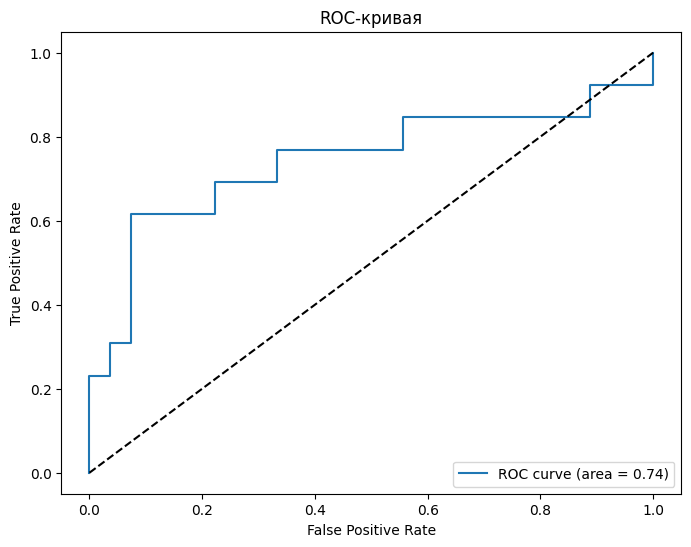

In [72]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()